In [ ]:
import pandas as pd

In [14]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

"""
A quick script for processing the results of the DQN
"""

time = []
positions = []
reward = []
file_to_read = "data/napcrack_73.csv"

# Read the orignal timeseries file
def read_time_series():
    # read as pandas dataframe
    data = pd.read_csv(file_to_read)

    # convert the data in data time series
    timeindex = pd.to_datetime(data.ix[::, 0].values, unit='s')

    for ch_num in range(data.shape[1]-1):
        # extract the product of interest
        data_time_series = pd.Series(data.ix[::, ch_num + 1].values, index=timeindex)
        # resample in 5Min by averaging
        data_resample = data_time_series.resample('15T').last()
        # remove the nans
        data_resample = data_resample.dropna()
        return data_resample


# Process the results file
def process(in_file, which_iter):
    ts = read_time_series()
    action = []
    with open(in_file) as f:
        content = f.readlines()
    for i in range(0, len(content)):
        if i != which_iter:
            continue # comment if you want to view results for all epochs
        line = content[i]
        relevant = line[line.index("["): len(line)].replace(" ", "")
        arrs = relevant[1:-3].split("],")
        for ac in arrs: # e.g. [time,action,reward]
#             import pdb; pdb.set_trace()
            cells = ac[1:].split(",")
            time = ts.index[int(cells[0][7:-2])]._repr_base
            action.append(int(cells[1]))
            reward.append(float(cells[2]))

    return ts, time, action, reward



/Library/Python/2.7/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


2016-02-02 09:00:00
[10, 11, 10, 20, 8, 8, 11, 11, 16, 11, 11, 22, 22, 24, 22, 22, 22, 22, 22, 8, 1, 24, 24, 11, 16, 22, 22, 22, 24, 24, 24, 11, 11, 11, 8, 16, 22, 22, 22, 22, 7, 22, 22, 22, 22, 22, 11, 11, 10, 19, 6, 6, 11, 11, 17, 21, 13, 13, 22, 22, 21, 6, 16, 22, 22, 24, 6, 24, 22, 22, 24, 24, 16, 11, 11, 22, 8, 11, 17, 11, 11, 11, 11, 24, 10, 11, 7, 22, 8, 18, 1, 11, 11, 24, 24, 11, 11, 18, 24, 24, 24, 16, 11, 11, 22, 22, 24, 24, 24, 8, 8, 8, 20, 8, 8, 20, 8, 8, 11, 15, 8, 8, 8, 8, 11, 8, 8, 8, 8, 11, 11, 24, 24, 24, 11, 24, 24, 8, 8, 20, 1, 11, 8, 8, 8, 1, 8, 11, 16, 24, 19, 22, 1, 11, 24, 24, 10, 11, 18, 24, 10, 8, 10, 11, 11, 11, 11, 22, 22, 22, 22, 11, 20, 24, 24, 24, 8, 10, 10, 24, 24, 24, 19, 10, 10, 10, 8, 8, 8, 8, 11, 10, 7, 20, 20, 8, 8, 11, 16, 10, 10, 8, 10, 8, 8, 8, 8, 20, 8, 8, 8, 8, 8, 15, 8, 8, 8, 8, 1, 8, 8, 1, 11, 10, 24, 24, 24, 8, 10, 9, 10, 11, 11, 8, 22, 22, 22, 22, 22, 22, 22, 18, 10, 22, 22, 22, 22, 22, 22, 22, 22, 11, 11, 11, 22, 6, 22, 22, 22, 22, 22, 22, 

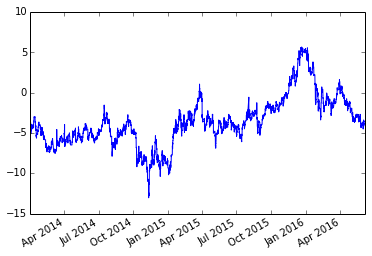

In [27]:
ts, time, action, reward = process("Trading_Experiment_02-02-12-24_0p0002_0p95/results.csv", 87)

%matplotlib inline
ts.plot()

# show the test starting time
print time
# sequence of actions taken
print action
# the rewards in this sequence
print reward
# the total reward
